##LSTM과 GRU 셀
###LSTM 구조(Long Short-Term Memory structure)
###LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input,
    train_target,
    test_size=0.2,
    random_state=42
)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(
    train_input,
    maxlen=100
)
val_seq = pad_sequences(
    val_input,
    maxlen=100
)

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(
    keras.layers.Embedding(
        500,
        16,
        input_length=100
    )
)
model.add(
    keras.layers.LSTM(8)
)
model.add(
    keras.layers.Dense(
        1,
        activation='sigmoid'
    )
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-lstm-model.h5',
    save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)
history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(
        val_seq,
        val_target
    ),
    callbacks=[
        checkpoint_cb,
        early_stopping_cb
    ]
)

Epoch 1/100
313/313 [==============================] - 12s 14ms/step - loss: 0.6926 - accuracy: 0.5350 - val_loss: 0.6919 - val_accuracy: 0.5902
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6906 - accuracy: 0.6165 - val_loss: 0.6892 - val_accuracy: 0.6322
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6854 - accuracy: 0.6518 - val_loss: 0.6799 - val_accuracy: 0.6466
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6624 - accuracy: 0.6578 - val_loss: 0.6364 - val_accuracy: 0.7044
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6130 - accuracy: 0.7286 - val_loss: 0.5948 - val_accuracy: 0.7336
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5778 - accuracy: 0.7414 - val_loss: 0.5693 - val_accuracy: 0.7314
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5483 - accuracy: 0.7545 - val_loss: 0.5401 - val_accuracy

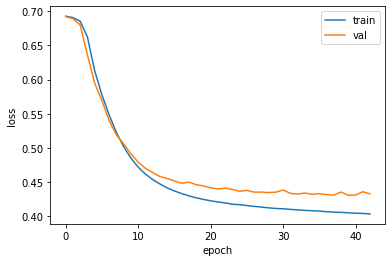

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

###순환층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()
model2.add(
    keras.layers.Embedding(
        500,
        16,
        input_length=100
    )
)
model2.add(
    keras.layers.LSTM(
        8,
        dropout=0.3
    )
)
model2.add(
    keras.layers.Dense(
        1,
        activation='sigmoid'
    )
)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-droupout-model.h5',
    save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)
history = model2.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(
        val_seq,
        val_target
    ),
    callbacks=[
        checkpoint_cb,
        early_stopping_cb
    ]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5299 - val_loss: 0.6917 - val_accuracy: 0.5584
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6899 - accuracy: 0.5957 - val_loss: 0.6882 - val_accuracy: 0.6096
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6831 - accuracy: 0.6418 - val_loss: 0.6761 - val_accuracy: 0.6898
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6487 - accuracy: 0.7005 - val_loss: 0.6039 - val_accuracy: 0.7124
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5842 - accuracy: 0.7135 - val_loss: 0.5674 - val_accuracy: 0.7356
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5582 - accuracy: 0.7337 - val_loss: 0.5459 - val_accuracy: 0.7440
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5368 - accuracy: 0.7506 - val_loss: 0.5294 - val_accuracy: 0.76

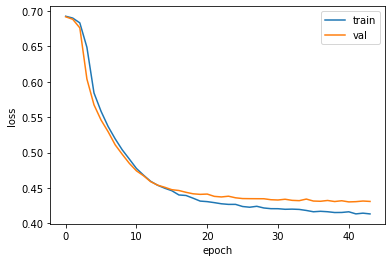

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

###2개의 층을 연결하기

In [19]:
model3 = keras.Sequential()
model3.add(
    keras.layers.Embedding(
        500,
        16,
        input_length=100
    )
)
model3.add(
    keras.layers.LSTM(
        8,
        dropout=0.3,
        return_sequences=True
    )
)
model3.add(
    keras.layers.LSTM(
        8,
        dropout=0.3
    )
)
model3.add(
    keras.layers.Dense(
        1,
        activation='sigmoid'
    )
)

In [20]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 100, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-2rnn-model.h5',
    save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)
history = model3.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(
        val_seq,
        val_target
    ),
    callbacks=[
        checkpoint_cb,
        early_stopping_cb
    ]
)

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6930 - accuracy: 0.5103 - val_loss: 0.6927 - val_accuracy: 0.5004
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6913 - accuracy: 0.5690 - val_loss: 0.6893 - val_accuracy: 0.6280
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6801 - accuracy: 0.6602 - val_loss: 0.6612 - val_accuracy: 0.6838
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6053 - accuracy: 0.7100 - val_loss: 0.5660 - val_accuracy: 0.7250
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5486 - accuracy: 0.7386 - val_loss: 0.5340 - val_accuracy: 0.7496
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5279 - accuracy: 0.7520 - val_loss: 0.5186 - val_accuracy: 0.7538
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5118 - accuracy: 0.7633 - val_loss: 0.5007 - val_accuracy:

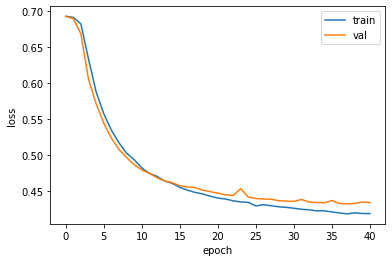

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

###GRU 구조(Gated Recurrent Unit Structure)

In [5]:
model4 = keras.Sequential()
model4.add(
    keras.layers.Embedding(
        500,
        16,
        input_length=100
    )
)
model4.add(
    keras.layers.GRU(8)
)
model4.add(
    keras.layers.Dense(
        1,
        activation='sigmoid'
    )
)

In [6]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-gru-model.h5',
    save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)
history = model4.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(
        val_seq,
        val_target
    ),
    callbacks=[
        checkpoint_cb,
        early_stopping_cb
    ]
)

Epoch 1/100
313/313 [==============================] - 10s 9ms/step - loss: 0.6925 - accuracy: 0.5246 - val_loss: 0.6916 - val_accuracy: 0.5554
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6901 - accuracy: 0.5766 - val_loss: 0.6889 - val_accuracy: 0.5860
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6865 - accuracy: 0.6040 - val_loss: 0.6849 - val_accuracy: 0.5934
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6810 - accuracy: 0.6146 - val_loss: 0.6787 - val_accuracy: 0.6032
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6725 - accuracy: 0.6271 - val_loss: 0.6693 - val_accuracy: 0.6138
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6596 - accuracy: 0.6405 - val_loss: 0.6554 - val_accuracy: 0.6258
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6400 - accuracy: 0.6571 - val_loss: 0.6334 - val_accuracy: 0.652

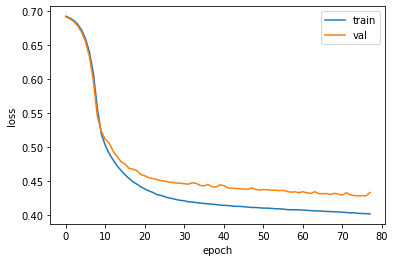

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

###LSTM과 GRU 셀로 훈련

In [27]:
test_seq = pad_sequences(
    test_input,
    maxlen=100
)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(
    test_seq,
    test_target
)

782/782 [==============================] - 5s 5ms/step - loss: 0.4283 - accuracy: 0.7995


[0.4282963275909424, 0.7995200157165527]